# JARVIS EDA

In [1]:
# Imports
import pandas as pd
from jarvis.db.figshare import data

### Checkpoint 1: Import 3D DFT Data from JARVIS and Pickel it


In [2]:
dft_data = data('dft_3d')
df = pd.DataFrame(dft_data)
df.to_pickle('jarvis_dft_3d.pkl')

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


- Features for semi-conductivity
    - `optb88vdw_bandgap`, `mbj_bandgap`, and `hse_gap` -> band gaps
    - `ehull` and `formation_energy_peratom` -> thermodynamic stability
    - `effective_masses_300K`, `avg_elec_mass`, `avg_hole_mass` -> electron mobility
    - `epsx`, `epsy`, `epsz` -> dielectric properties
     

In [3]:
features = df.columns.tolist()
print(features)

['jid', 'spg_number', 'spg_symbol', 'formula', 'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms', 'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor', 'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh', 'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz', 'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg', 'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij', 'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric', 'dfpt_piezo_max_dielectric_electronic', 'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode', 'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond', 'pcond', 'nkappa', 'pkappa', 'ehull', 'Tc_supercon', 'dimensionality', 'efg', 'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density', 'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv', 'mbj_bandgap', 'hse_gap', 'reference', 'search']


### Checkpoint 2: Filter Out Semi-Conductors and Transparent Semi-conductors, then store as CSV 


In [4]:
def has_element(atoms_dict, element='O'):
    atoms = Atoms.from_dict(atoms_dict)
    return element in atoms.elements

def filter_semiconductors(df, band_gap_min = 0.1, band_gap_method = 'optb88vdw_bandgap'):
    df[band_gap_method] = pd.to_numeric(df[band_gap_method], errors='coerce')
    df['ehull'] = pd.to_numeric(df['ehull'], errors='coerce')
    df = df.dropna(subset=[band_gap_method, 'ehull'])
    df['has_oxygen'] = df['atoms'].apply(lambda x: has_element(x, 'O'))
    semis = df[
        (df[band_gap_method] > band_gap_min) &
        (df['ehull'] <= 0.1) &
        (df['has_oxygen'] == True)
        ]
    return semis

In [5]:
import pandas as pd
import numpy as np
from jarvis.core.atoms import Atoms

# Read in pickled data
df = pd.read_pickle('jarvis_dft_3d.pkl')

# Filter Semi-Conductors Using 3 Different Bandgap Estimations
semis_vdw = filter_semiconductors(df, 0.1)
semis_mbj = filter_semiconductors(df, 0.1, "mbj_bandgap")
semis_hse = filter_semiconductors(df, 0.1, "hse_gap")

# Filter Transparent Semi-Conductors Using 3 Different Bandgap Estimations
transparent_semis_vdw = filter_semiconductors(df, 3.0)
transparent_semis_mbj = filter_semiconductors(df, 3.0, "mbj_bandgap")
transparent_semis_hse = filter_semiconductors(df, 3.0, "hse_gap")


semis_vdw.to_csv('semis_vdw.csv', index=False)
print(f"Saved {len(semis_vdw)} entries to semis_vdw.csv")
semis_mbj.to_csv('semis_vdw.mbj', index=False)
print(f"Saved {len(semis_mbj)} entries to semis_mbj.csv")
semis_hse.to_csv('semis_vdw.hse', index=False)
print(f"Saved {len(semis_hse)} entries to semis_hse.csv")

transparent_semis_vdw.to_csv('transparent_semis_vdw.csv', index=False)
print(f"Saved {len(transparent_semis_vdw)} entries to transparent_semis_vdw.csv")
transparent_semis_mbj.to_csv('transparent_semis_mbj.csv', index=False)
print(f"Saved {len(transparent_semis_mbj)} entries to transparent_semis_mbj.csv")
transparent_semis_hse.to_csv('transparent_semis_mbj.hse', index=False)
print(f"Saved {len(transparent_semis_hse)} entries to transparent_semis_hse.csv")

/var/folders/3g/2_hbrsxj3yl3qf3v5b2vvh6h0000gn/T/ipykernel_22229/3760232568.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_oxygen'] = df['atoms'].apply(lambda x: has_element(x, 'O'))
/var/folders/3g/2_hbrsxj3yl3qf3v5b2vvh6h0000gn/T/ipykernel_22229/3760232568.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_oxygen'] = df['atoms'].apply(lambda x: has_element(x, 'O'))
/var/folders/3g/2_hbrsxj3yl3qf3v5b2vvh6h0000gn/T/ipykernel_22229/3760232568.py:9: SettingWithCopyWarning: 
A value is tr

Saved 8520 entries to semis_vdw.csv
Saved 2828 entries to semis_mbj.csv
Saved 12 entries to semis_hse.csv
Saved 3185 entries to transparent_semis_vdw.csv
Saved 1879 entries to transparent_semis_mbj.csv
Saved 10 entries to transparent_semis_hse.csv


In [6]:
import torch
from torch_geometric.data import Data

def atoms_dict_to_graph(atoms_dict, cutoff=5.0):
    # Convert Jarvis dictionary to Jarvis Atoms
    atoms = Atoms.from_dict(atoms_dict)

    Z = atoms.atomic_numbers  # Jarvis property for atomic numbers
    positions = atoms.cart_coords  # Cartesian coordinates

    # Build neighbor list using ASE neighbor_list (still works)
    from ase.neighborlist import neighbor_list
    from ase import Atoms as ASEAtoms

    # Create ASE Atoms object just for neighbor list
    ase_atoms = ASEAtoms(numbers=Z, positions=positions)
    i, j, _ = neighbor_list('ijS', ase_atoms, cutoff=cutoff)
    edge_index = torch.from_numpy(np.vstack((i, j))).long()

    x = torch.tensor(Z, dtype=torch.float32).unsqueeze(1)
    pos = torch.tensor(positions, dtype=torch.float32)

    return Data(x=x, edge_index=edge_index, pos=pos)


In [7]:
graphs = [atoms_dict_to_graph(atoms_dict) for atoms_dict in df['atoms']]


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def pyg_to_nx(data):
    """
    Convert a PyTorch Geometric Data object to a NetworkX graph
    """
    edge_index = data.edge_index.numpy()
    G = nx.Graph()
    
    # Add nodes
    for idx, feature in enumerate(data.x.numpy()):
        G.add_node(idx, atomic_number=int(feature[0]))  # store atomic number as node attribute
    
    # Add edges
    for source, target in edge_index.T:
        G.add_edge(source, target)
    
    return G


In [9]:
from jarvis.core.atoms import Atoms

# Assuming g_data corresponds to graphs[6]
atoms_dict = semis_vdw['atoms'].iloc[6]  # get the original atoms dict
atoms = Atoms.from_dict(atoms_dict)
atomic_symbols = atoms.elements  # list of element symbols


In [10]:
import visualization
visualization.__file__


ModuleNotFoundError: No module named 'visualization'

In [16]:
import sys
sys.path.append("../code/visualization")

import visualization

i = 13
g_data = graphs[i]
G = pyg_to_nx(g_data)
atoms_dict = transparent_semis_vdw['atoms'].iloc[i]
pos_tensor = g_data.pos

visualization.visualize_graph(G, atoms_dict, pos_tensor)




AttributeError: type object 'Atoms' has no attribute 'from_dict'

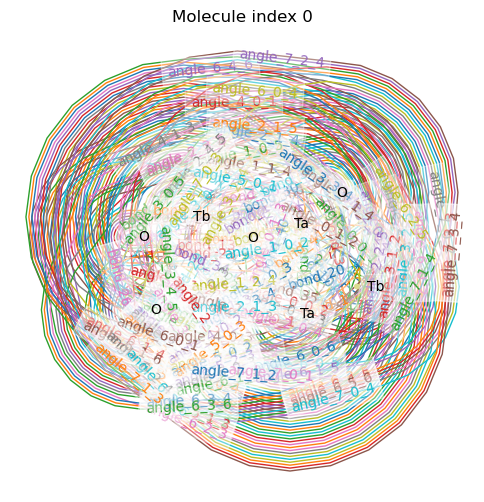

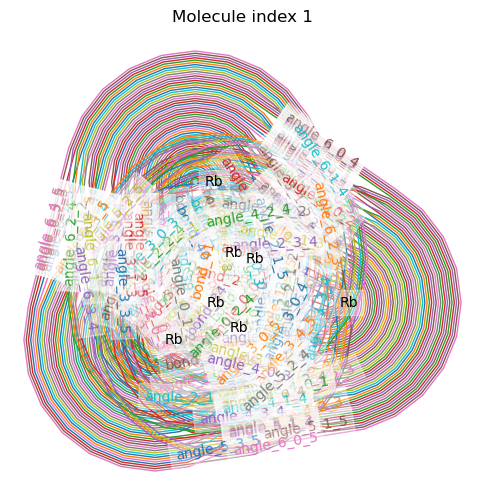

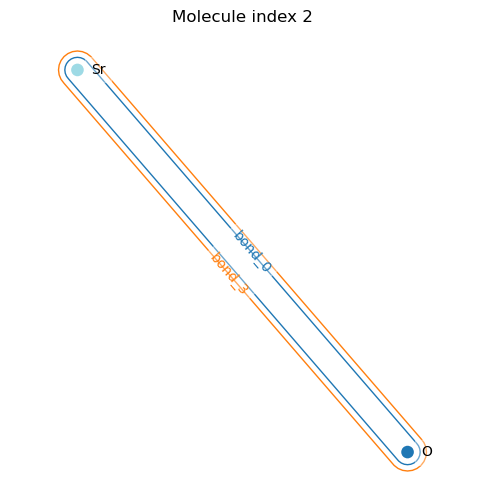

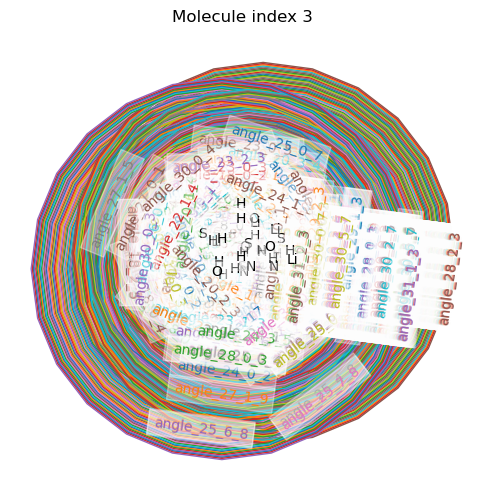

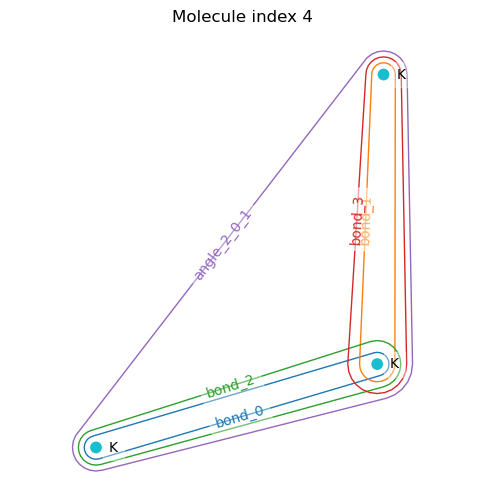

In [95]:
import matplotlib.pyplot as plt
import hypernetx as hnx
from jarvis.core.atoms import Atoms
import matplotlib.cm as cm
import numpy as np

def plot_hypergraphs(graphs, atoms_list, N=5):
    for i in range(min(N, len(graphs))):
        g_data = graphs[i]
        atoms_dict = atoms_list.iloc[i]
        atoms = Atoms.from_dict(atoms_dict)
        
        atomic_symbols = atoms.elements
        atomic_numbers = atoms.atomic_numbers
        num_atoms = len(atomic_symbols)
        
        # Build hyperedges
        edge_array = g_data.edge_index.T.numpy()
        hyperedges = {}
        for j, e in enumerate(edge_array):
            if max(e) < num_atoms:
                hyperedges[f"bond_{j}"] = list(e)
        
        # 3-atom hyperedges (angles)
        for atom in range(num_atoms):
            neighbors = edge_array[edge_array[:,0]==atom, 1]
            neighbors = [n for n in neighbors if n < num_atoms]
            for m in range(len(neighbors)):
                for n in range(m+1, len(neighbors)):
                    hyperedges[f"angle_{atom}_{m}_{n}"] = [atom, neighbors[m], neighbors[n]]
        
        H = hnx.Hypergraph(hyperedges)
        
        # Node labels
        node_labels_dict = {n: atomic_symbols[n] for n in H.nodes() if n < num_atoms}
        
        # Map atomic numbers to colors using a colormap
        norm = plt.Normalize(min(atomic_numbers), max(atomic_numbers))
        cmap = cm.tab20
        node_colors = {n: cmap(norm(atomic_numbers[n])) for n in H.nodes() if n < num_atoms}
        
        # Draw hypergraph (no node_size)
        plt.figure(figsize=(6,6))
        hnx.draw(
            H,
            with_node_labels=True,
            node_labels=node_labels_dict,
            nodes_kwargs={'facecolor': node_colors}  # only allowed kwargs
        )
        plt.title(f"Molecule index {i}")
        plt.show()

# --- Usage ---
plot_hypergraphs(graphs, transparent_semis_vdw['atoms'], N=5)
